# Quels paramètres visuels d’une tumeur permettent de prédire le plus efficacement si un cancer du sein est bénin (B) ou malin (M) ?

L’identification des tumeurs malignes constitue un enjeu majeur dans le diagnostic du cancer du sein. À partir de mesures morphologiques extraites d’images de tumeurs, ce projet vise à déterminer quels paramètres visuels permettent de prédire le plus efficacement si une tumeur est bénigne ou maligne à l’aide de modèles statistiques.

## 📋 Description des colonnes du dataset

### Informations générales
- **Taille du dataset** : 569 observations
- **Qualité des données** : Aucune valeur manquante, aucun doublon
- **Type de problème** : Classification binaire (bénin vs malin)

---

### Variables et moyenne

| Colonne | Type | Description | Moyenne |
|--------|------|-------------|---------|
| **diagnosis** | Categorical | Type de tumeur • B = bénigne, M = maligne | B : 63 %<br>M : 37 % |
| **radius_mean** | Float | Rayon moyen de la tumeur | 14.1 |
| **texture_mean** | Float | Texture moyenne (irrégularité) | 19.3 |
| **perimeter_mean** | Float | Périmètre moyen | 92.0 |
| **area_mean** | Float | Surface moyenne | 655 |
| **smoothness_mean** | Float | Lissage moyen de la surface | 0.10 |
| **compactness_mean** | Float | Compacité moyenne | 0.10 |
| **concavity_mean** | Float | Creux moyens | 0.09 |
| **concave points_mean** | Float | Nombre moyen de points concaves | 0.05 |
| **symmetry_mean** | Float | Symétrie moyenne | 0.18 |
| **fractal_dimension_mean** | Float | Complexité moyenne | 0.06 |
| **radius_se** | Float | Variabilité du rayon | 0.40 |
| **texture_se** | Float | Variabilité de la texture | 1.22 |
| **perimeter_se** | Float | Variabilité du périmètre | 2.87 |
| **area_se** | Float | Variabilité de la surface | 40.3 |
| **smoothness_se** | Float | Variabilité du lissage | 0.007 |
| **compactness_se** | Float | Variabilité de la compacité | 0.025 |
| **concavity_se** | Float | Variabilité des creux | 0.031 |
| **concave points_se** | Float | Variabilité des points concaves | 0.012 |
| **symmetry_se** | Float | Variabilité de la symétrie | 0.021 |
| **fractal_dimension_se** | Float | Variabilité de la complexité | 0.0038 |
| **radius_worst** | Float | Rayon maximal observé | 16.3 |
| **texture_worst** | Float | Texture la plus irrégulière | 25.7 |
| **perimeter_worst** | Float | Périmètre maximal | 107.3 |
| **area_worst** | Float | Surface maximale | 880.6 |
| **smoothness_worst** | Float | Lissage le plus faible | 0.13 |
| **compactness_worst** | Float | Compacité maximale | 0.25 |
| **concavity_worst** | Float | Creux les plus marqués | 0.27 |
| **concave points_worst** | Float | Nombre maximal de points concaves | 0.11 |
| **symmetry_worst** | Float | Symétrie la plus extrême | 0.29 |
| **fractal_dimension_worst** | Float | Complexité maximale de la forme | 0.08 |

---

### 🔹 Différence entre `_mean`, `_se` et `_worst`

- **_mean** → valeur moyenne de la tumeur
  > La boule en général, sa taille et sa forme moyenne

- **_se** → variabilité / stabilité
  > Montre si la boule change beaucoup ou peu lorsqu’on la mesure plusieurs fois

- **_worst** → valeur la plus extrême / pire
  > Montre le moment où la boule est la **plus grande, la plus irrégulière ou la plus bizarre**, souvent le plus utile pour prédire si elle est méchante

Dans ce projet, les variables moyennes (`_mean`) ont été privilégiées car elles offrent un bon compromis entre stabilité, interprétabilité et pouvoir explicatif, ce qui est particulièrement adapté à une première analyse exploratoire et explicative.

---

### 🔹 Résumé simplifié

- `_mean` = boule **en moyenne**
- `_se` = boule **qui bouge beaucoup ou peu**
- `_worst` = boule **la plus vilaine / extrême**, souvent la plus importante pour deviner si elle est malin

---

### Observations importantes

- La variable **`diagnosis`** présente un **déséquilibre modéré** (plus de tumeurs bénignes que malignes), à prendre en compte lors de l’évaluation des modèles
- Les variables liées à la **taille** (`radius_mean`, `perimeter_mean`, `area_mean`) sont fortement corrélées entre elles
- Les variables de **forme et d’irrégularité** (`concavity_mean`, `concave points_mean`, `compactness_mean`) sont particulièrement discriminantes pour identifier les tumeurs malignes
- L’absence de valeurs manquantes facilite l’analyse exploratoire et le prétraitement des données

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
DATA_PATH = "breastcancer_analysis/data/Cancer_Data.csv"
df_raw = pd.read_csv(DATA_PATH)
df = df_raw.copy()

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Chaque observation correspond à une tumeur du sein décrite par différentes caractéristiques visuelles, tandis que la variable `diagnosis` indique si la tumeur est bénigne (B) ou maligne (M).

In [3]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
df.duplicated().sum()

np.int64(0)

<Axes: >

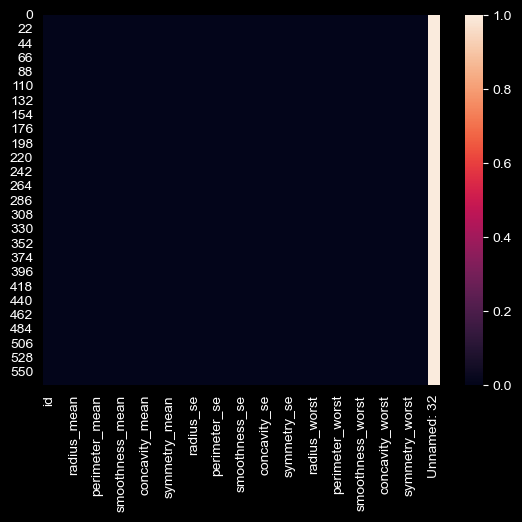

In [5]:
sns.heatmap(df.isnull())

Afin de simplifier l’analyse et de se concentrer sur les caractéristiques morphologiques globales des tumeurs, une sous-sélection des variables moyennes a été réalisée.

In [6]:
colonnes = [
    "diagnosis",
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave points_mean",
    "symmetry_mean",
    "fractal_dimension_mean"
]

df_copy = df[colonnes].copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


La variable `diagnosis` a été encodée sous forme binaire afin de permettre l’estimation de modèles de classification, avec 0 pour les tumeurs bénignes et 1 pour les tumeurs malignes.

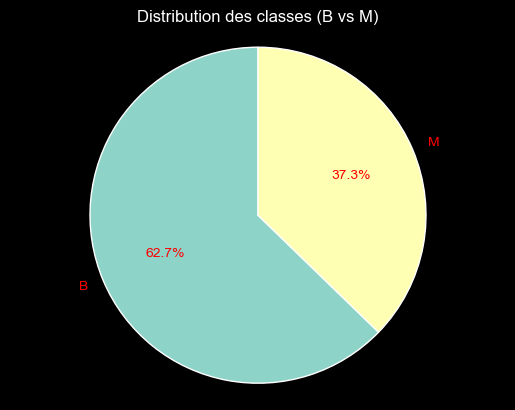

In [7]:
counts = df["diagnosis"].value_counts()

plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={
        "color": "red",
    }
)

plt.title("Distribution des classes (B vs M)")
plt.axis("equal")
plt.show()

Text(0.5, 1.0, 'Class Distribution (bénin vs malin)')

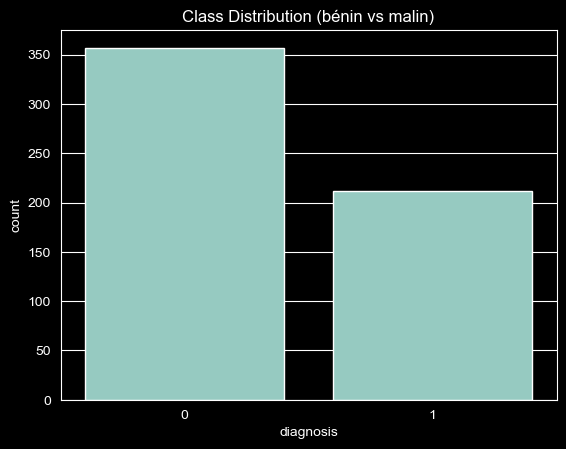

In [8]:
df_copy['diagnosis'] = df_copy['diagnosis'].map({'B': 0, 'M': 1})

sns.countplot(x='diagnosis', data=df_copy)
plt.title('Class Distribution (bénin vs malin)')

On fait une matrice de corrélation entre les différentes colonnes de notre DataFrame

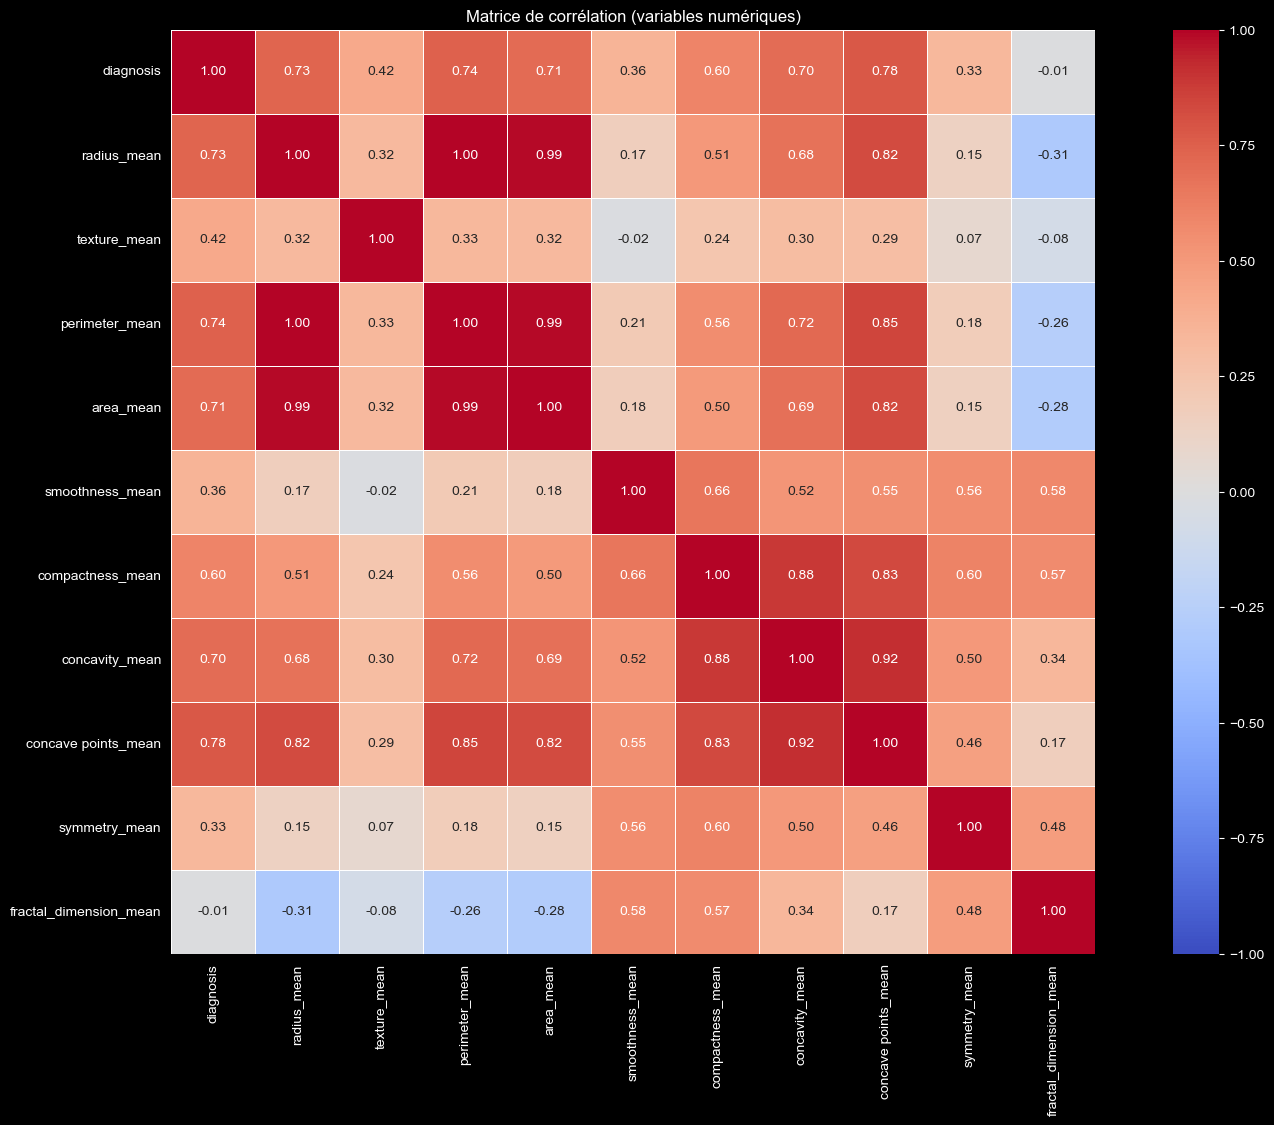

In [9]:
corr = df_copy.select_dtypes(include="number").corr()

plt.figure(figsize=(20, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

La matrice de corrélation met en évidence de fortes corrélations entre les variables
liées à la taille de la tumeur (rayon, périmètre, surface), suggérant une information
redondante. En revanche, les variables liées à la forme et à l’irrégularité semblent
apporter une information complémentaire pour la prédiction de la malignité.

Les variables `perimeter_mean`, `concavity_mean` et `compactness_mean` ont été retenues
car elles décrivent trois dimensions complémentaires de la tumeur : sa taille, son
irrégularité de contour et sa densité. Ces caractéristiques morphologiques sont
particulièrement pertinentes d’un point de vue médical pour distinguer les tumeurs
bénignes des tumeurs malignes.

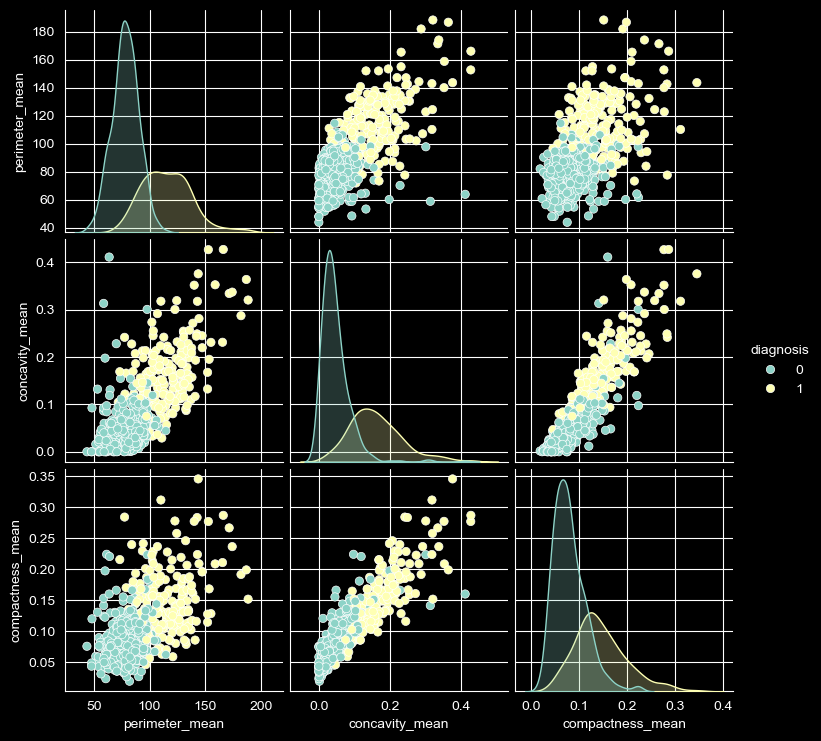

In [10]:
sns.pairplot(df_copy[['perimeter_mean', 'concavity_mean', 'compactness_mean', 'diagnosis']], hue='diagnosis')

<Axes: xlabel='perimeter_mean', ylabel='diagnosis'>

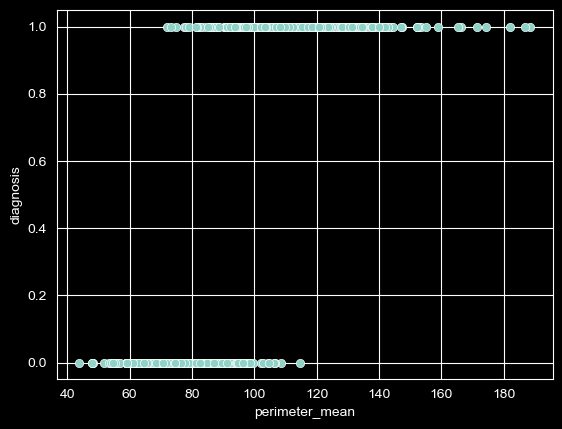

In [11]:
sns.scatterplot(data=df_copy, x="perimeter_mean", y="diagnosis")

In [12]:
perimeter_model = smf.logit(formula='diagnosis ~ perimeter_mean', data=df_copy)
perimeter_result = perimeter_model.fit()
perimeter_result.params

Optimization terminated successfully.
         Current function value: 0.267561
         Iterations 8


Intercept        -15.713328
perimeter_mean     0.163986
dtype: float64

Dans ce modèle logistique, l’intercept fortement négatif indique que, pour un périmètre nul, la probabilité de malignité est quasi nulle, tandis que le coefficient associé au périmètre moyen montre qu’une augmentation d’une unité de celui-ci accroît légèrement les log-odds de malignité (d’environ 0,16), traduisant une augmentation progressive du risque.

In [23]:
np.random.seed(42)

row = df_copy.sample(n=1, random_state=42)
x = row["perimeter_mean"].iloc[0]

b0 = perimeter_result.params["Intercept"]
b1 = perimeter_result.params["perimeter_mean"]

log_odds = b0 + b1 * x
p = 1 / (1 + np.exp(-log_odds))

print("perimeter_mean =", x)
print("probabilité prédite =", p)

perimeter_mean = 81.09
probabilité prédite = 0.08198267162312863


Pour une observation présentant un périmètre moyen de 81,09, le modèle estime une probabilité de malignité d’environ 8 %, ce qui traduit un risque relativement faible selon cette seule variable explicative.

<Axes: xlabel='concavity_mean', ylabel='diagnosis'>

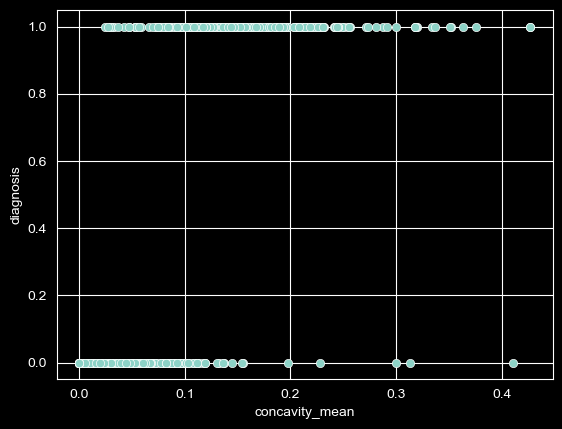

In [14]:
sns.scatterplot(data=df_copy, x="concavity_mean", y="diagnosis")

In [15]:
concavity_model = smf.logit(formula='diagnosis ~ concavity_mean', data=df_copy)
concavity_result = concavity_model.fit()
concavity_result.params

Optimization terminated successfully.
         Current function value: 0.336755
         Iterations 7


Intercept         -3.784990
concavity_mean    36.845698
dtype: float64

In [16]:
x = row["concavity_mean"].iloc[0]

b0 = concavity_result.params["Intercept"]
b1 = concavity_result.params["concavity_mean"]

log_odds = b0 + b1 * x
p = np.exp(log_odds) / (1 + np.exp(log_odds))

print("concavity_mean =", x)
print("probabilité prédite =", p)

concavity_mean = 0.08005
probabilité prédite = 0.30248502217351025


Selon ce modèle logistique univarié, une tumeur présentant une concavité moyenne de 0,08 est associée à une probabilité estimée d’environ 30 % d’être maligne.

<Axes: xlabel='compactness_mean', ylabel='diagnosis'>

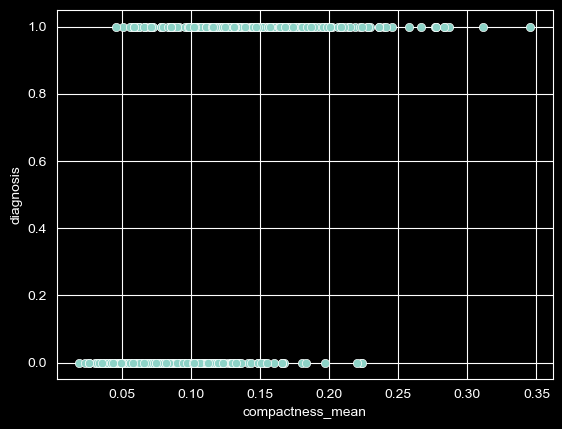

In [17]:
sns.scatterplot(data=df_copy, x="compactness_mean", y="diagnosis")

In [18]:
compactness_model = smf.logit(formula='diagnosis ~ compactness_mean', data=df_copy)
compactness_result = compactness_model.fit()
compactness_result.params

Optimization terminated successfully.
         Current function value: 0.447093
         Iterations 7


Intercept           -4.400120
compactness_mean    36.379803
dtype: float64

In [19]:
x = row["compactness_mean"].iloc[0]

b0 = compactness_result.params["Intercept"]
b1 = compactness_result.params["compactness_mean"]

log_odds = b0 + b1 * x
p = np.exp(log_odds) / (1 + np.exp(log_odds))

print("compactness_mean =", x)
print("probabilité prédite =", p)

compactness_mean = 0.1058
probabilité prédite = 0.36560079778240495


Selon ce modèle logistique univarié, une tumeur présentant une compacité moyenne de 0,106 est associée à une probabilité estimée d’environ 37 % de malignité.

Toutefois, ces variables peuvent être corrélées entre elles et partager une partie
de l’information explicative. Il est donc nécessaire d’estimer un modèle multivarié
afin d’isoler l’effet propre de chaque variable, toutes choses égales par ailleurs.

In [20]:
all_model = smf.logit(formula='diagnosis ~ compactness_mean + concavity_mean + perimeter_mean', data=df_copy)
all_result = all_model.fit()
all_result.params

Optimization terminated successfully.
         Current function value: 0.201213
         Iterations 9


Intercept          -16.271691
compactness_mean     6.469968
concavity_mean      20.633316
perimeter_mean       0.143272
dtype: float64

L’intercept représente la valeur des log-odds de malignité lorsque le périmètre, la compacité et la concavité sont égaux à zéro.

In [21]:
b0 = all_result.params["Intercept"]
b1 = all_result.params["concavity_mean"]
b2 = all_result.params["compactness_mean"]
b3 = all_result.params["perimeter_mean"]

x1 = row["concavity_mean"].iloc[0]
x2 = row["compactness_mean"].iloc[0]
x3 = row["perimeter_mean"].iloc[0]

log_odds = b0 + b1*x1 + b2*x2 + b3*x3
p = np.exp(log_odds) / (1 + np.exp(log_odds))

print("concavity_mean =", x1)
print("compactness_mean =", x2)
print("perimeter_mean =", x3)
print(p)

concavity_mean = 0.08005
compactness_mean = 0.1058
perimeter_mean = 81.09
0.08968040714133393


Pour une tumeur présentant une concavité moyenne de 0,080, une compacité moyenne de 0,106 et un périmètre moyen de 81,09 mm, le modèle logistique multivarié estime une probabilité de malignité d’environ 9 %.

### Conclusion

Cette analyse met en évidence l’importance des caractéristiques morphologiques liées
à l’irrégularité de la forme, telles que la concavité et la compacité, dans la prédiction
de la malignité des tumeurs du sein. La régression logistique permet de combiner ces
informations afin d’estimer une probabilité de malignité, tout en restant un outil
statistique d’aide à la décision et non un diagnostic médical.